### Step 1: Opening the files and reviewing the general information

In [2]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
games = pd.read_csv("/datasets/games.csv")
print(games.info())
print()
print(games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     2

### Step 2: Data Preparation
 

In [78]:
games.columns = games.columns.str.lower()
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [79]:
games["year_of_release"] = pd.to_datetime(games["year_of_release"].astype('Int64'),format="%Y",errors="coerce")
games["user_score"] = pd.to_numeric(games["user_score"], errors="coerce")
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB
None


The data types of the year_of_release and user_score columns were converted to datetime and float, respectively. This transformation was performed because year_of_release represents temporal information, while having user_score stored as an object type limits numerical analysis. Since user_score is a quantitative variable, converting it to a numeric data type enables proper statistical analysis and data processing.


In [80]:
print(games.isna().sum())
print(games["user_score"].unique())
print(games["critic_score"].unique())
print(games["rating"].unique())


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64
[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22.

In [1]:
games = games.dropna(subset=["name"])
games["rating"] = games["rating"].fillna("unknown")
print(games.duplicated.sum())

NameError: name 'games' is not defined

Se decidió eliminar las dos filas de los valores ausentes de name ya que dos es un número despreciable frente al número de filas dataframe. Al hacer esto, se eliminaron las mismas filas que tenían los dos valores ausentes en genre. 
Decidí no rellenar los valores ausentes de la columna year_of_release ya que al hacerlo podría generar un sesgo y distorsionar el análisis de tendencias. 
Los valores de critic score tampoco se rellenaron ya que el que no estén estos valores significa que estos nunca fueron revisados. Ya que esto no es un error aleatorio decidí no rellenar los valores ausentes.
Así mismo, decidí mantener los valores ausentes de la columna user_score ya que representan juegos que no fueron rankeados por los usuarios y rellenar los valores ausentes podría distorsionar el análisis de las preferencias de usuarios.
Finalmente, la columna rating presenta 6766 valores ausentes, probablemente correspondientes a juegos antiguos o a títulos que no fueron clasificados en ciertas regiones. Se decidió mantener estos valores como una categoría 'Unknown' para no introducir sesgo en el análisis.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo! Soluciones válidas en este caso para manejar los nulos serían:

- Introducir un valor irreal que depende de la columna y su significado (-1, -999999, etc.).
- Dejar los huecos sin cambios.

Los valores de Year_of_release se pueden cambiar a cero o eliminarse. Por su parte, no hay mucho que se puede hacer con los valores nulos de critic_score y user_score, los cuales se pueden dejar a null.

</div>

In [8]:
cols_with_tbd = [col for col in games.columns if games[col].astype(str).str.contains("TBD").any()]
print(cols_with_tbd)

[]


Finalmente, no se encontró la columna que contiene la abreviatura TBD que menciona la descripción del proyecto.

In [9]:
games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"]     
print(games.head())

                       name platform year_of_release         genre  na_sales  \
0                Wii Sports      Wii      2006-01-01        Sports     41.36   
1         Super Mario Bros.      NES      1985-01-01      Platform     29.08   
2            Mario Kart Wii      Wii      2008-01-01        Racing     15.68   
3         Wii Sports Resort      Wii      2009-01-01        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB      1996-01-01  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        74.09  
1        39.47  
2        32.23  
3        29.82  
4      

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen trabajo calculando las ventas totales.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Otra forma de hacerlo es de la siguiente manera:

	data['total_sales']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

</div>

</div>

### Paso 3: Análisis de datos:

      year  count
0   1980.0      9
1   1981.0     46
2   1982.0     36
3   1983.0     17
4   1984.0     14
5   1985.0     14
6   1986.0     21
7   1987.0     16
8   1988.0     15
9   1989.0     17
10  1990.0     16
11  1991.0     41
12  1992.0     43
13  1993.0     60
14  1994.0    121
15  1995.0    219
16  1996.0    263
17  1997.0    289
18  1998.0    379
19  1999.0    338
20  2000.0    350
21  2001.0    482
22  2002.0    829
23  2003.0    775
24  2004.0    762
25  2005.0    939
26  2006.0   1006
27  2007.0   1197
28  2008.0   1427
29  2009.0   1426
30  2010.0   1255
31  2011.0   1136
32  2012.0    653
33  2013.0    544
34  2014.0    581
35  2015.0    606
36  2016.0    502


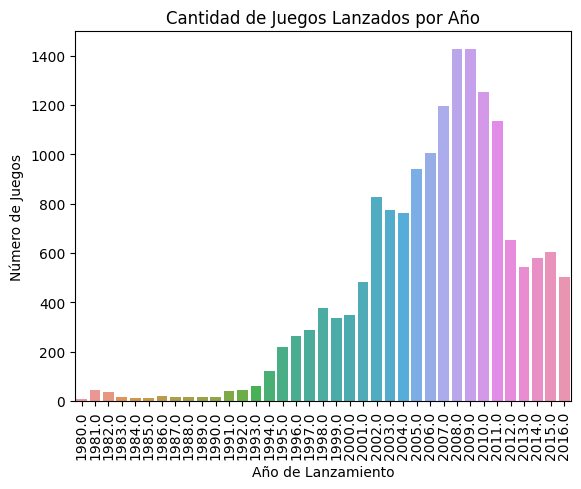

In [36]:
games["year"] = games["year_of_release"].dt.year

games_by_year = games.groupby("year").size().reset_index(name="count")
print(games_by_year)
sns.barplot(data=games_by_year,x="year",y="count")
plt.xticks(rotation=90)
plt.title("Cantidad de Juegos Lanzados por Año")
plt.ylabel("Número de Juegos")
plt.xlabel("Año de Lanzamiento")
plt.show()
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen análisis sobre el lanzamiento de los videojuegos. Además, el gráfico utilizado es excelente y las conclusiones se presentan claramente.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Es correcto mostrar los años con decimales?

</div>
    
</div>

El diagrama de barras muestra que el número de videojuegos lanzados por año aumenta progresivamente a lo largo del tiempo, lo que refleja el crecimiento y la maduración de la industria de los videojuegos.

Los primeros años, en particular durante la década de 1980 y principios de la década de 1990, presentan un número muy reducido de lanzamientos. Estos valores pueden considerarse atípicos debido al tamaño limitado del mercado y a que la industria se encontraba en una etapa temprana de desarrollo. En consecuencia, los datos de este período son menos representativos y deben interpretarse con cautela.

A partir de finales de los años noventa, se observa un crecimiento más estable y consistente en la cantidad de juegos lanzados. Este período concentra un mayor volumen de datos, lo que lo convierte en una etapa más significativa y confiable para realizar análisis de tendencias, comparaciones entre plataformas y estudios del comportamiento del mercado.

En conclusión, aunque los primeros años aportan un contexto histórico importante, los períodos más recientes resultan más relevantes desde el punto de vista analítico debido a su mayor consistencia y representatividad estadística.

In [11]:

top_platforms = games.groupby("platform")["total_sales"].sum().sort_values(ascending=False).head(6).index

print(top_platforms)



Index(['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS'], dtype='object', name='platform')


In [12]:
 top_games = games[games["platform"].isin(top_platforms)]
sales_by_year_platform = top_games.groupby(["year","platform"])["total_sales"].sum().reset_index()
print(sales_by_year_platform)

      year platform  total_sales
0   1985.0       DS         0.02
1   1994.0       PS         5.63
2   1995.0       PS        34.00
3   1996.0       PS        89.16
4   1997.0       PS       128.30
..     ...      ...          ...
62  2015.0      Wii         1.05
63  2015.0     X360        10.86
64  2016.0      PS3         3.23
65  2016.0      Wii         0.17
66  2016.0     X360         1.40

[67 rows x 3 columns]


Text(0, 0.5, 'Ventas totales')

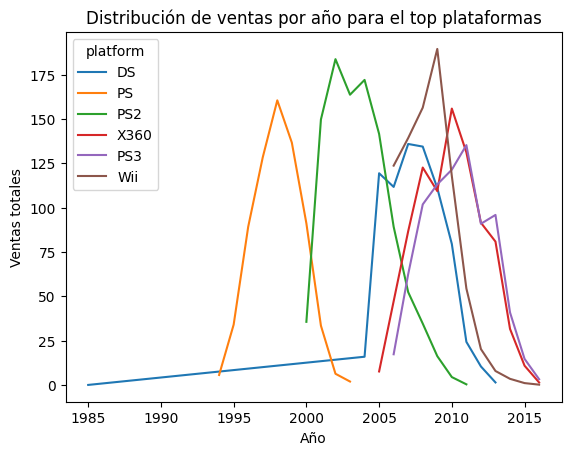

In [13]:
sns.lineplot(data=sales_by_year_platform,x="year",y="total_sales",hue="platform")
plt.show
plt.title("Distribución de ventas por año para el top plataformas")
plt.xlabel("Año")
plt.ylabel("Ventas totales")

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El gráfico muestra claramente la evolución de las ventas anuales por plataforma. Las conclusiones asociadas se presentan claramente. 

</div>

Gracias al gráfico de líneas de la distribución de ventas por año podemos observar que en promedio cada plataforma tuvieron en promedio ventas entre 6 y 7 años después de su lanzamiento. Con excepción del PS3 y X360, que tuvieron ventas aproximandamente por 10 años.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Realizas un análisis correcto del ciclo de vida de las consolas. La gráfica es clara y respalda tus conclusiones.

</div>

In [14]:
relevant_years = games[games["year"] > 2011]

Se decidió trabajar con los últimos 5 años. Esto debido a que la vida media de las plataformas tiende a ser 7 años. Vamos a ver qué plataformas siguen activas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El período analizado es correcto. En la dinámica industria de los videojuegos, tomar intervalos de tiempo largos debería evitarse, ya que definitivamente conducirá a rastrear tendencias obsoletas. Pero tampoco deberías tomar un período demasiado corto.

</div>

   platform  total_sales
0       PS4       265.79
1       PS3       245.53
2      X360       216.14
3       3DS       185.74
4      XOne       145.05
5      WiiU        76.24
6        PC        56.88
7       PSV        43.38
8       Wii        32.76
9        DS        11.84
10      PSP        11.02


Text(0.5, 0, 'Plataforma')

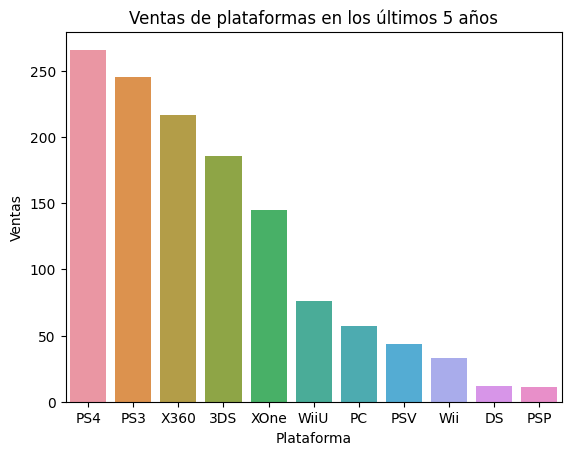

In [15]:
relevant_games = relevant_years.groupby("platform")["total_sales"].sum().sort_values(ascending=False).reset_index()
print(relevant_games)

sns.barplot(data=relevant_games,x="platform",y="total_sales")
plt.title("Ventas de plataformas en los últimos 5 años")
plt.ylabel("Ventas")
plt.xlabel("Plataforma")

En el diagrama de barras se observa que las plataformas que liderarán el mercado para el 2017 serán PS4, PS3, X360, 3DS y XOne. Mientras que WiiU, PC, PSV, WII, DS y PSP se reducen. 

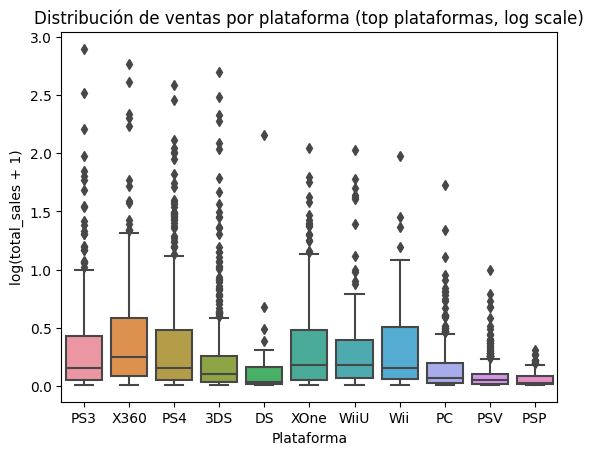

In [16]:
# Por recomendación de Dot, se usa escala logarítmica (np.log1p) para visualizar mejor las ventas muy sesgadas
sns.boxplot(data=relevant_years,x="platform",y=np.log1p(relevant_years["total_sales"]))
plt.ylabel("log(total_sales + 1)")
plt.title("Distribución de ventas por plataforma (top plataformas, log scale)")
plt.xlabel("Plataforma")
plt.show()


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Se realiza un análisis correcto de la distribución de ventas por plataforma.

</div>

El diagrama de caja en escala logarítmica nos muestra que la mediana de la mayoría de las plataformas se sitúa en 0.2 (convertido a escala normal sería 0.22 millones de ventas). Cabe resaltar que el promedio de ventas se vería afectado considerablemente por la presencia de los valores atipicos en cada una de las plataformas, por lo que es mejor interpretar con la mediana para comprender la tendencia central de las ventas.

In [22]:
ps4_games = relevant_years[relevant_years["platform"] == "PS4"]

# eliminamos las columnas NA de user_score y critic_score para este análisis

ps4_games =  ps4_games.dropna(subset=["critic_score", "user_score"])
print(ps4_games.tail())

                                        name platform year_of_release  \
16486                     Super Dungeon Bros      PS4      2016-01-01   
16499  Sherlock Holmes: The Devil's Daughter      PS4      2016-01-01   
16500                            Root Letter      PS4      2016-01-01   
16526                             Dungeons 2      PS4      2016-01-01   
16530                Carmageddon: Max Damage      PS4      2016-01-01   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
16486        Action      0.01       0.0      0.00          0.0          42.0   
16499     Adventure      0.01       0.0      0.00          0.0          70.0   
16500     Adventure      0.00       0.0      0.01          0.0          69.0   
16526  Role-Playing      0.01       0.0      0.00          0.0          61.0   
16530        Action      0.01       0.0      0.00          0.0          51.0   

       user_score rating  total_sales    year  
16486         2.3   E10+        

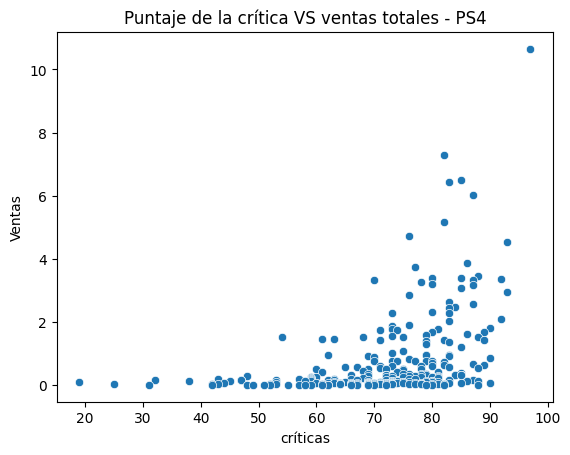

la correlación entre el puntaje de la crítica y las ventas es de: 0.40522336661501335


In [24]:
# Gráfico de dispersión de las ventas y critic_score

sns.scatterplot(data=ps4_games,x="critic_score",y="total_sales")
plt.title("Puntaje de la crítica VS ventas totales - PS4")
plt.xlabel("críticas")
plt.ylabel("Ventas")
plt.show()

# Correlación entre ventas y critic_score

critic_corr = ps4_games["critic_score"].corr(ps4_games["total_sales"])
print(f"la correlación entre el puntaje de la crítica y las ventas es de: {critic_corr}")

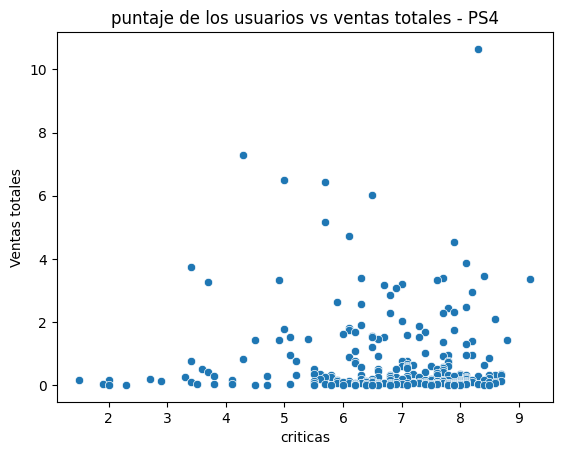

la correlación entre los puntajes de los usuarios y el total de las ventas es de: -0.03292287016409416


In [27]:
sns.scatterplot(data=ps4_games,x="user_score",y="total_sales")
plt.title("puntaje de los usuarios vs ventas totales - PS4")
plt.xlabel("criticas")
plt.ylabel("Ventas totales")
plt.show()

user_corr = ps4_games["user_score"].corr(ps4_games["total_sales"])
print(f"la correlación entre los puntajes de los usuarios y el total de las ventas es de: {user_corr}")

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Tal cual. Podemos ver una correlación positiva para las reseñas de los críticos, es decir, un puntaje más alto generalmente trae más ingresos. Sin embargo, la correlación entre el puntaje de los usuarios y los ingresos es casi cero, lo que significa que los ingresos por ventas no se ven muy afectados por la opinión de los usuarios.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Como detalle, en tus comentarios le llamas "crítica de los usuarios" a la reseñas de los críticos ;)

</div>


</div>

Al analizar los juegos de PS4 se observa lo siguiente:
* la correlación entre la crítica de los usuarios y el total de las ventas fue de 0.405, lo que indica una relación moderada y positiva. Esto significa que, de manera general, los juegos con mejores reseñas e críticos tienden a tener mayores ventas.
* la correlación entre el puntaje de los usuarios y las ventas es de -0.032, lo cual es practicamente nula. Esto indica que la opinión de los usuarios no tiene un efecto claro sobre las ventas.
  Para PS4, las reseñas de críticos son un mejor predictor de ventas que las reseñas de usuarios. Esto sugiere que los jugadores pueden estar más influenciados por críticas profesionales que por las opiniones de otros usuarios.
  

In [28]:
# Vamos a contar cuántas plataformas tiene cada juego 
platform_counts = games.groupby("name")["platform"].nunique().reset_index()
platform_counts.rename(columns={"platform": "num_platforms"}, inplace=True)
print(platform_counts.head())

                          name  num_platforms
0               Beyblade Burst              1
1            Fire Emblem Fates              1
2         Frozen: Olaf's Quest              2
3   Haikyu!! Cross Team Match!              1
4            Tales of Xillia 2              1


In [30]:
multi_games = platform_counts[platform_counts["num_platforms"] > 1].sort_values(by="num_platforms",ascending=False)
print(multi_games.head(10))

                                         name  num_platforms
6715              Need for Speed: Most Wanted             10
5470                            Madden NFL 07              9
7785                              Ratatouille              9
5143                 LEGO Marvel Super Heroes              9
2952                                  FIFA 14              9
5211             Lego Batman 3: Beyond Gotham              8
5156                          LEGO The Hobbit              8
1306                                     Cars              8
2953                                  FIFA 15              8
5152  LEGO Star Wars II: The Original Trilogy              8


In [34]:
nfs = games[games["name"] == "Need for Speed: Most Wanted"]
nfs_sales = nfs.groupby("platform")["total_sales"].sum().reset_index().sort_values(by="total_sales",ascending=False)
print(nfs_sales.head())

  platform  total_sales
4      PS2         3.90
8     X360         2.56
5      PS3         2.23
9       XB         0.99
6      PSV         0.79


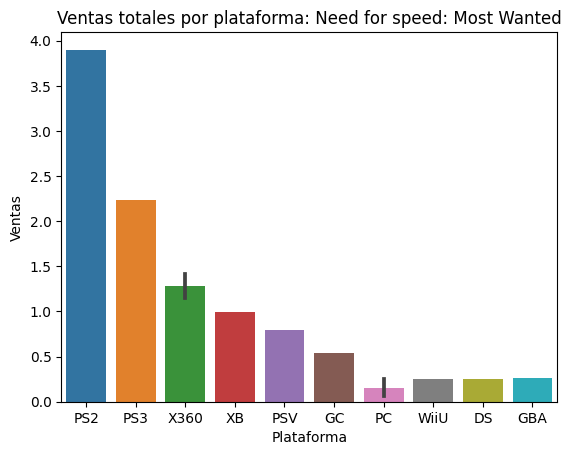

In [35]:
sns.barplot(data=nfs,x="platform",y="total_sales")
plt.title("Ventas totales por plataforma: Need for speed: Most Wanted")
plt.xlabel("Plataforma")
plt.ylabel("Ventas")
plt.show()

Se analizó el juego con más plataformas del dataset con el propósito de observar y comparar las ventas totales del juego en cada plataforma. Se observa que las 3 plataformas con mayores ventas se ubica en el top 3 de plataformas de nuestro análisis. Las demás ventas de las otras plataformas están por debajo del millón de dolares. Esto confirma nuestro análisis de rentabilidad, donde encontramos que ps2, ps3 y x360 hacían parte de las plataformas con más ventas

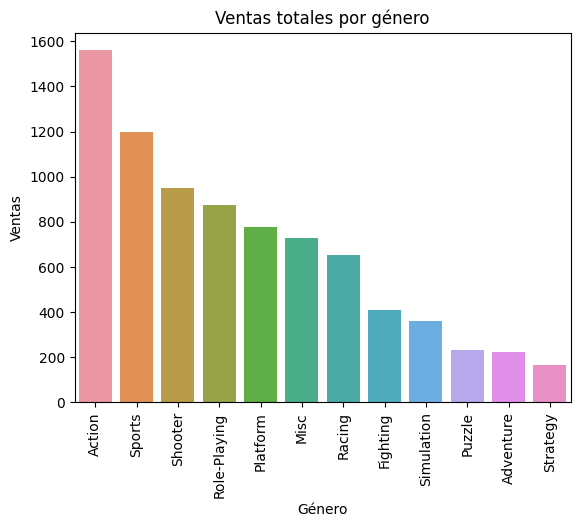

In [44]:
most_profitable = games.groupby(["genre"])["total_sales"].sum().reset_index().sort_values(by="total_sales",ascending=False)

sns.barplot(data=most_profitable,x="genre",y="total_sales")
plt.title("Ventas totales por género")
plt.xticks(rotation=90)
plt.xlabel("Género")
plt.ylabel("Ventas")
plt.show()

Al analizar la distribución general de las ventas por género, se observa que Action, Sports y Shooter son los géneros más rentables del mercado, con ventas totales aproximadas de 1600, 1200 y 1000 millones respectivamente. Estos géneros concentran la mayor parte de las ventas globales, lo que indica una alta demanda sostenida a lo largo del tiempo.

En contraste, géneros como Puzzle, Adventure y Strategy presentan ventas considerablemente más bajas, con promedios cercanos a los 200 millones, lo que sugiere que tienen un público más reducido o de nicho.

De manera general, se puede afirmar que los géneros con ventas altas suelen estar asociados a experiencias de juego más accesibles, competitivas o de acción rápida, lo que favorece su adopción masiva. Por otro lado, los géneros con ventas bajas tienden a ser más especializados, requerir mayor inversión de tiempo o atraer a audiencias más específicas, lo que limita su alcance comercial.

En conclusión, el género es un factor relevante en el desempeño comercial de un videojuego, y los datos muestran una clara diferencia entre géneros de alta rentabilidad y géneros de menor impacto en ventas.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Todos los gráficos y conclusiones son correctos. 

</div>

### Paso 4:Creación de un perfil de usuario para cada región: 

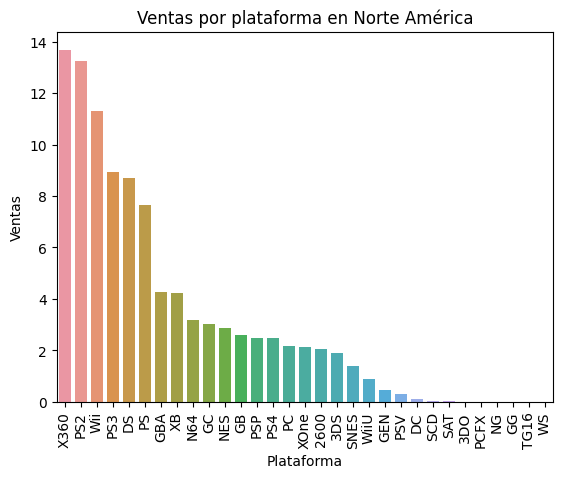

In [57]:
na = games.groupby("platform")["na_sales"].sum().reset_index().sort_values(by="na_sales",ascending=False)
na["na_sales_pct"] = na["na_sales"] / na["na_sales"].sum() * 100
sns.barplot(data=na,x="platform",y="na_sales_pct")
plt.title("Ventas por plataforma en Norte América")
plt.xlabel("Plataforma")
plt.xticks(rotation=90)
plt.ylabel("Ventas")
plt.show()



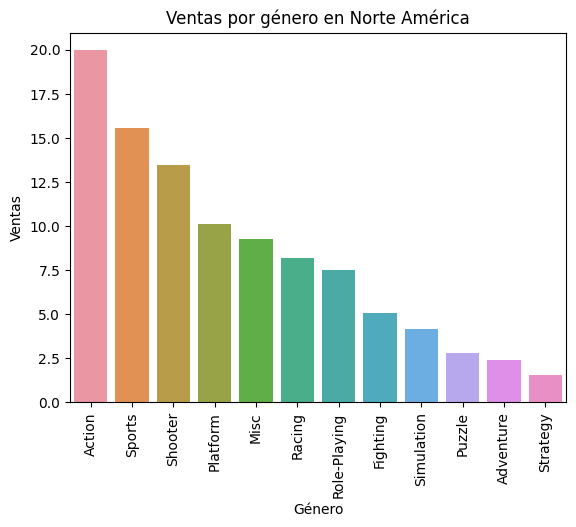

In [82]:

na_genre = games.groupby("genre")["na_sales"].sum().reset_index().sort_values(by="na_sales",ascending=False)
na_genre["na_sales_pct"] = na_genre["na_sales"] / na["na_sales"].sum() * 100
sns.barplot(data=na_genre,x="genre",y="na_sales_pct")
plt.title("Ventas por género en Norte América")
plt.xlabel("Género")
plt.xticks(rotation=90)
plt.ylabel("Ventas")
plt.show()



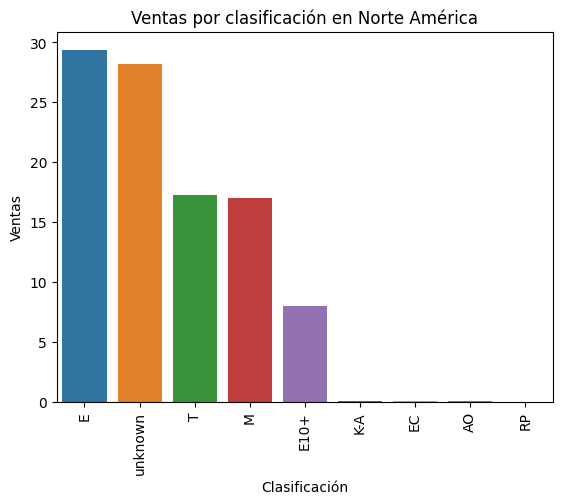

In [84]:
na_rating = games.groupby("rating")["na_sales"].sum().reset_index().sort_values(by="na_sales",ascending=False)
na_rating["na_sales_pct"] = na_rating["na_sales"] / na["na_sales"].sum() * 100
sns.barplot(data=na_rating,x="rating",y="na_sales_pct")
plt.title("Ventas por clasificación en Norte América")
plt.xlabel("Clasificación")
plt.xticks(rotation=90)
plt.ylabel("Ventas")
plt.show()


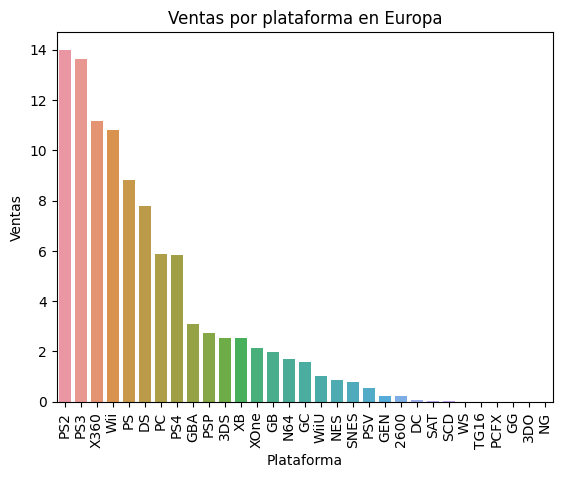

In [87]:

eu = games.groupby("platform")["eu_sales"].sum().reset_index().sort_values(by="eu_sales",ascending=False)
eu["eu_sales_pct"] = eu["eu_sales"] / eu["eu_sales"].sum() * 100
sns.barplot(data=eu,x="platform",y="eu_sales_pct")
plt.title("Ventas por plataforma en Europa")
plt.xlabel("Plataforma")
plt.xticks(rotation=90)
plt.ylabel("Ventas")
plt.show()



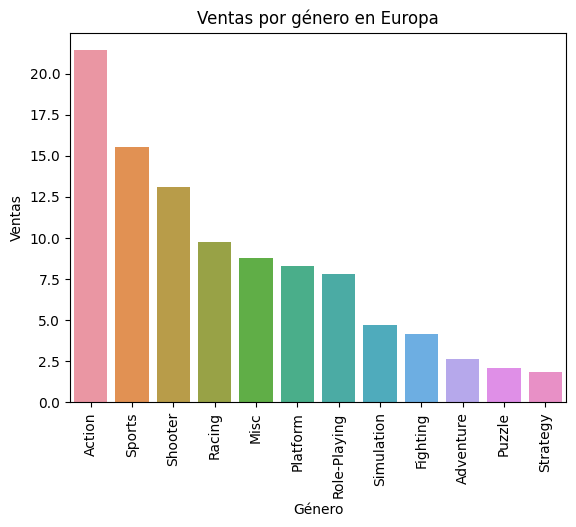

In [88]:
eu_genre = games.groupby("genre")["eu_sales"].sum().reset_index().sort_values(by="eu_sales",ascending=False)
eu_genre["eu_sales_pct"] = eu_genre["eu_sales"] / eu_genre["eu_sales"].sum() * 100
sns.barplot(data=eu_genre,x="genre",y="eu_sales_pct")
plt.title("Ventas por género en Europa")
plt.xlabel("Género")
plt.xticks(rotation=90)
plt.ylabel("Ventas")
plt.show()


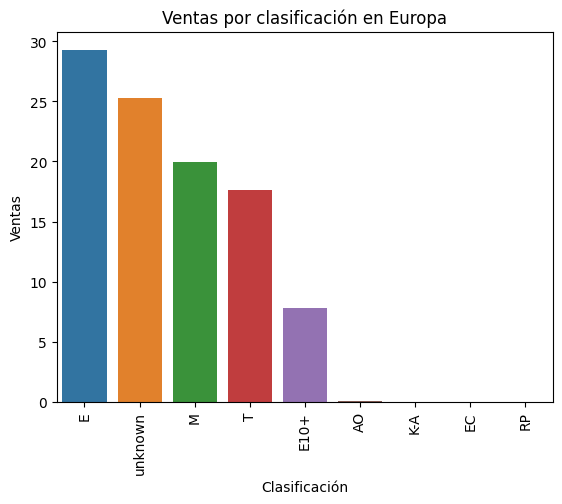

In [89]:
eu_rating = games.groupby("rating")["eu_sales"].sum().reset_index().sort_values(by="eu_sales",ascending=False)
eu_rating["eu_sales_pct"] = eu_rating["eu_sales"] / eu_rating["eu_sales"].sum() * 100
sns.barplot(data=eu_rating,x="rating",y="eu_sales_pct")
plt.title("Ventas por clasificación en Europa")
plt.xlabel("Clasificación")
plt.xticks(rotation=90)
plt.ylabel("Ventas")
plt.show()

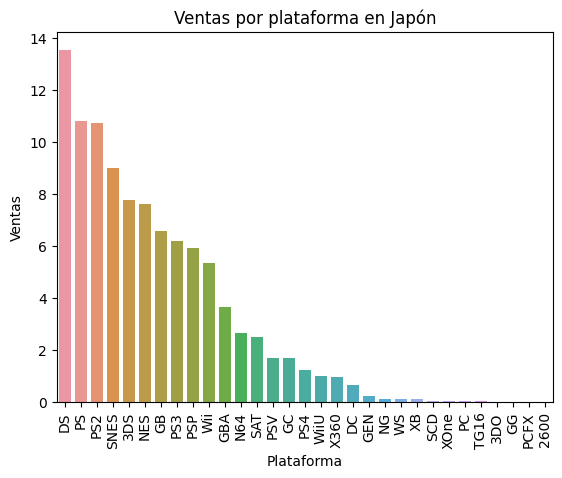

In [90]:
jp = games.groupby("platform")["jp_sales"].sum().reset_index().sort_values(by="jp_sales",ascending=False)
jp["jp_sales_pct"] =jp["jp_sales"] / jp["jp_sales"].sum() * 100
sns.barplot(data=jp,x="platform",y="jp_sales_pct")
plt.title("Ventas por plataforma en Japón")
plt.xlabel("Plataforma")
plt.xticks(rotation=90)
plt.ylabel("Ventas")
plt.show()

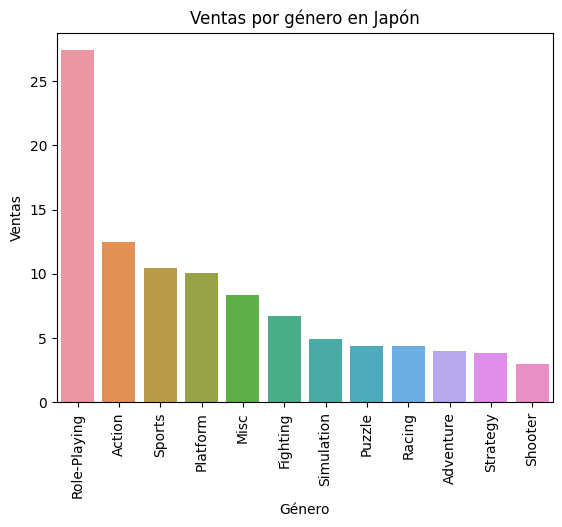

In [91]:
jp_genre = games.groupby("genre")["jp_sales"].sum().reset_index().sort_values(by="jp_sales",ascending=False)
jp_genre["jp_sales_pct"] =jp_genre["jp_sales"] / jp_genre["jp_sales"].sum() * 100
sns.barplot(data=jp_genre,x="genre",y="jp_sales_pct")
plt.title("Ventas por género en Japón")
plt.xlabel("Género")
plt.xticks(rotation=90)
plt.ylabel("Ventas")
plt.show()

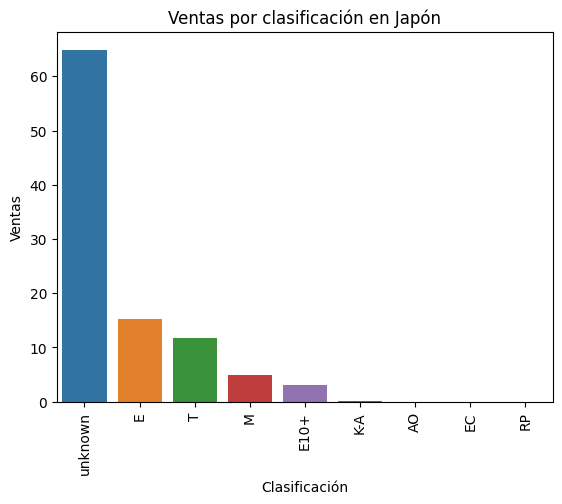

In [92]:
jp_rating = games.groupby("rating")["jp_sales"].sum().reset_index().sort_values(by="jp_sales",ascending=False)
jp_rating["jp_sales_pct"] =jp_rating["jp_sales"] / jp_rating["jp_sales"].sum() * 100
sns.barplot(data=jp_rating,x="rating",y="jp_sales_pct")
plt.title("Ventas por clasificación en Japón")
plt.xlabel("Clasificación")
plt.xticks(rotation=90)
plt.ylabel("Ventas")
plt.show()

## Plataformas principales y variaciones regionales:
En Norteamérica (NA), las plataformas con mayor cuota de mercado fueron X360 (14%), PS2 (13%) y Wii (12%). En Europa (UE), la distribución varió ligeramente: PS2 (14%), PS3 (13%) y X360 (11%), mostrando que la PS2 tuvo un desempeño fuerte en ambas regiones, pero el PS3 es más popular en Europa que en Norteamérica. Por otro lado, en Japón (JP), las plataformas más vendidas fueron DS (14%), PS (11%) y PS2 (11%), evidenciando una clara preferencia por consolas portátiles y clásicas frente a las consolas de sobremesa que dominan NA y UE.

Conclusión sobre plataformas:
Las plataformas líderes varían de región en región, lo que refleja diferencias culturales y de preferencia tecnológica. En NA y UE predominan las consolas de sobremesa modernas, mientras que en JP destacan consolas portátiles y de generaciones anteriores. Esto indica que las estrategias de mercado deben adaptarse a la región: lo que vende en América y Europa no necesariamente será popular en Japón.

En NA, los géneros más vendidos fueron Action (20%), Sports (15%) y Shooter (13%). En UE, el patrón es muy similar: Action (21%), Sports (15%), Shooter (12.5%), mostrando gustos parecidos entre estas dos regiones. Sin embargo, en JP, los juegos más vendidos se concentran en Role-Playing (27%), seguidos por Action (13%) y Sports (10%), reflejando una clara preferencia por juegos de historia y narrativa profunda.

Conclusión sobre géneros:
Los géneros más rentables difieren según la región: NA y UE muestran fuerte demanda por acción y deportes, mientras que en JP predominan los juegos de rol. Esto resalta la importancia de personalizar el desarrollo y la promoción de juegos según los gustos locales.

En NA, la clasificación Everyone (29%) lidera las ventas, seguida de juegos sin clasificación (28%) y adolescentes/adultos (16% cada uno). En UE, la tendencia es similar: Everyone (29%) y sin clasificación (25%) lideran, aunque los juegos para adultos representan una mayor proporción (20%). En JP, destaca que la mayoría de las ventas corresponde a juegos sin clasificación (63%), mientras que Everyone y Adolescentes representan solo el 13% y 11% respectivamente.

Conclusión sobre ESRB:
Las clasificaciones afectan las ventas de manera distinta según la región. En NA y UE, los juegos para todos o sin clasificación son los más populares, lo que puede reflejar regulaciones más flexibles o preferencias de contenido familiar. En JP, los juegos sin clasificación dominan ampliamente, posiblemente porque los sistemas de calificación locales son distintos o menos relevantes para los consumidores.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El análisis realizado por cada región está muy bien fundamentado. Además, los resultados se presentan de forma clara y ordenada, lo que facilita la comprensión de la información. Esto permite identificar rápidamente las diferencias y similitudes entre cada región, y contribuye a un mejor entendimiento de los patrones generales. 

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Como sugerencia, podrías agregar una visualización comparativa (por ejemplo, un gráfico de barras apiladas o un heatmap) para reforzar visualmente los contrastes entre regiones en géneros o plataformas.

</div>

</div>

### Pruebas de hipótesis:

La hipótesis nula será que la media de las calificaciones de los usuarios de XOne y la media de las calificaciones de los usuarios de PC son iguales, mientras que la hipótesis alternativa es que son diferentes. Para este caso vamos a utilizar una prueba t-test para muestras independientes, dado que las dos muestras son muestras independientes. Finalmente, se hará un análisis de hipótesis de dos colas, dado que la dirección no importa en este caso.

In [115]:
print(games["platform"].unique())

# Filtrar los datos por plataforma
XOne = games[games["platform"] == "XOne"]
PC = games[games["platform"] == "PC"]

xone_scores = XOne["user_score"].dropna()
pc_scores   = PC["user_score"].dropna()

# Prueba t de Welch (no asumimos varianzas iguales)
t_stat, p_value = st.ttest_ind(xone_scores, pc_scores, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H₀, las medias son significativamente diferentes")
else:
    print("No rechazamos H₀, no hay evidencia suficiente para decir que las medias son distintas")

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
t-statistic: -4.653422798410771
p-value: 4.935072360183574e-06
Rechazamos H₀, las medias son significativamente diferentes


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Al realizar una prueba de hipótesis, es muy importante verificar los supuestos. El t-test que usaste funciona bien cuando se cumplen ciertos supuestos, como que las varianzas de ambos grupos (sábados lluviosos y no lluviosos) sean similares. Puedes realizar la prueba de levene para comprobar que los dos grupos tienen la misma varianza y, de esta forma, podrás saber el valor del parámetro equal_var que se debe utilizar en la función stats.ttest_ind.

</div>

La hipótesis nula será que la media de las calificaciones de los usuarios para el género Acción y la media de las calificaciones de los usuarios del género Deporte son iguales, mientras que la hipótesis alternativa es que son diferentes. Para este caso vamos a utilizar una prueba t-test para muestras independientes, dado que las dos muestras son muestras independientes. Finalmente, se hará un análisis de hipótesis de dos colas, dado que la dirección no importa en este caso.

In [117]:
action = games[games["genre"] == "Action"]
sports = games[games["genre"] == "Sports"]

action_score = action["user_score"].dropna()
sports_score = sports["user_score"].dropna()

# Prueba t de Welch, no asumimos las varianzas iguales

t_stat, p_value = st.ttest_ind(action_score,sports_score,equal_var=False)

print(f"el pvalue es: {p_value}")

# Interpretación
alpha = 0.05

if p_value < alpha:
    print("rechazamos la hipótesis nula, las medias son significativamente diferentes")
else:
    print("No podemos rechazar la hipótesis nula, no hay evidencia suficiente para decir que las medias son distintas")

el pvalue es: 0.11483818791498286
No podemos rechazar la hipótesis nula, no hay evidencia suficiente para decir que las medias son distintas


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>
Los resultados obtenidos son coherentes con lo esperado. Muy buen trabajo aplicando las pruebas de hipótesis!

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>
He notado que hay fragmentos de código repetidos en ambos procesos. Sería recomendable encapsularlos en funciones para mejorar la reutilización y mantener un código más limpio y modular.
</div>

</div>

### Paso 6:
El análisis de los datos de ventas de videojuegos permite identificar patrones claros en función de la plataforma, el género y la región. A lo largo del estudio, observamos que ciertas plataformas dominan las ventas en diferentes regiones: X360, PS2 y Wii en Norteamérica; PS2, PS3 y X360 en Europa; DS, PS y PS2 en Japón. Del mismo modo, los géneros más vendidos varían, siendo Action y Sports predominantes en NA y UE, mientras que Role-Playing lidera en Japón. Esto refleja diferencias culturales y preferencias de mercado según la región.

Respecto a las clasificaciones ESRB, se evidencia que influyen en las ventas de manera distinta por región. Por ejemplo, en Japón la mayoría de los juegos vendidos carecen de clasificación, mientras que en NA y UE la categoría "Everyone" concentra un gran porcentaje de ventas, indicando que la edad objetivo del público impacta el desempeño comercial en cada mercado.

Al evaluar la relación entre reseñas y ventas, encontramos que la opinión de los críticos tiene una correlación moderada con las ventas, mientras que las calificaciones de usuarios presentan poca relación. Esto sugiere que, para ciertas plataformas, las reseñas profesionales pueden ser un mejor indicador de éxito que la opinión de los jugadores.

En los análisis comparativos de plataformas y géneros, las pruebas de hipótesis indicaron lo siguiente: la diferencia de medias en las calificaciones de usuarios entre XOne y PC fue estadísticamente significativa, mientras que no se encontró evidencia suficiente para afirmar que las ventas promedio de los géneros Action y Sports fueran distintas. Esto implica que, aunque algunas plataformas muestran ventajas claras, ciertos géneros tienen un desempeño relativamente comparable.

En general, los hallazgos muestran que las decisiones de lanzamiento de juegos exitosos dependen de múltiples factores: plataforma, género, clasificación y región. También queda claro que los valores atípicos y los juegos estrella pueden sesgar los promedios de ventas, por lo que es más confiable interpretar la mediana y la distribución logarítmica para entender el comportamiento real del mercado.